In [67]:
#| default_exp ndwi_class

# NDWI 

In [1]:
#|hide
from nbdev.showdoc import *

In [2]:
#|export
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

from flood_exercise import utils_func
from flood_exercise import const_vals as CONST

In [40]:
#|export

class ndwi():

  def __init__(self,
               path_to_s2_tiles : str , #path to the folder that contains the S2 images
               path_to_labeled_tiles : str , #path to the labled images (values -1,0,1)
               ):
    # get the list of tiles from each folder , get only files end with .tif
    self.tiles_s2 = utils_func.load_list_paths(path_to_s2_tiles, filter_file = True)
    self.labels = utils_func.load_list_paths(path_to_labeled_tiles , filter_file = True)


    # get only tiles from specific region (Bolivia for the task) 
    self.tiles_s2_for_evaluation = [x for x in self.tiles_s2 if CONST.REGION_STR_2 in x]

    #calculate threshold
    self.threshold = self._get_ndwi_threshold_()

    #calculate ndwi and mask with new threshold
    self._water_prob_new_imgs_()


  def _ndwi_s2_(self ,
                     path):
         
         with rasterio.open(path) as src:
            green = src.read(CONST.GREEN_BAND)
            nir = src.read(CONST.NIR_BAND)

            ndwi = (green - nir) / (green + nir)

            # Replace NaN values with 0
            ndwi = np.nan_to_num(ndwi, nan=-1)
            # # generate mask 
            # mask = np.where(ndwi<0 ,0 ,1)

            # #calculate precentage of water pixel out of all the pixels in the image
            # perc_water = round((np.sum(mask) / (mask.shape[0]*mask.shape[1]))*100,2)
         return ndwi #, mask ,perc_water
  


  def _get_ndwi_threshold_(self,
                           ):
    
       threshold = [None , None]

       #for each image , calculate NDWI ,get the match labled image
       for s2_path in self.tiles_s2_for_evaluation:
          
          #calculate NDWI, get the image id to match with the labels
          path_id = s2_path.split(CONST.SPLIT_TILES_NAMES_STR1)[-1].split(CONST.SPLIT_TILES_NAMES_STR2)[1]
          ndwi_img  = self._ndwi_s2_(s2_path)

          # match labeled image
          match_label_tile_path = [x for x in self.labels if path_id in x][0]
          match_label_tile = rasterio.open(match_label_tile_path).read(1)  

          #create water mask : change -1 to 0 
          water_mask = np.where(match_label_tile == -1, 0, match_label_tile)
          ndwi_img = np.where(ndwi_img == -1, np.NaN , ndwi_img)

          #multiply water_mask with NDWI :
          mask_ndwi = ndwi_img * water_mask

          # plt.imshow(mask_ndwi)
          # plt.title(path_id)
          # plt.show()
          
          #caluclate the min and max 
          min_val = np.nanmin(mask_ndwi)
          max_val = np.nanmax(mask_ndwi)


          if threshold[0] is None or min_val < threshold[0]:
              threshold[0] = min_val
          if threshold[1] is None or max_val > threshold[1]:
              threshold[1] = max_val

          # print(f' current threshold : {threshold} , path: {path_id}')


       return threshold


  def _water_prob_new_imgs_(self):
      
      for s2_path in self.tiles_s2:
          # src = rasterio.open(s2_path)

          #calcualte NDWI
          ndwi = self._ndwi_s2_(s2_path)

          # change null values 
          # ndwi_img = np.where(ndwi_img == -1, np.NaN , ndwi_img)
          # ndwi = np.nan_to_num(ndwi, nan=-1)

          # mask the image to get only water pixels based on threshold
        #   mask_with_threshold_condition = (ndwi > self.threshold[0]) & (ndwi < self.threshold[1])
          mask_with_threshold_condition = (ndwi > self.threshold[0]) & (ndwi < 0)

          masked_ndwi = np.where(mask_with_threshold_condition, np.nan , ndwi)
          masked_ndwi = np.where(masked_ndwi == -1, np.NaN , masked_ndwi)
          plt.imshow(masked_ndwi)
          plt.title(s2_path)
          plt.colorbar()
          plt.show()

  

            # #calculate precentage of water pixel out of all the pixels in the image
            # perc_water = round((np.sum(mask) / (mask.shape[0]*mask.shape[1]))*100,2)
        #  return ndwi #, mask ,perc_water
          
          
          
      

     


C:\Users\USER\AppData\Local\Temp\ipykernel_10088\418435400.py:31: RuntimeWarning: invalid value encountered in divide
  ndwi = (green - nir) / (green + nir)


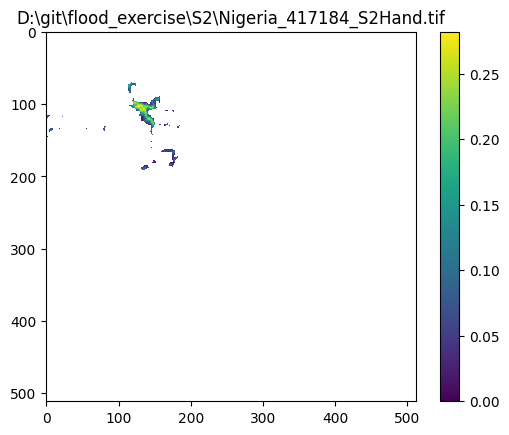

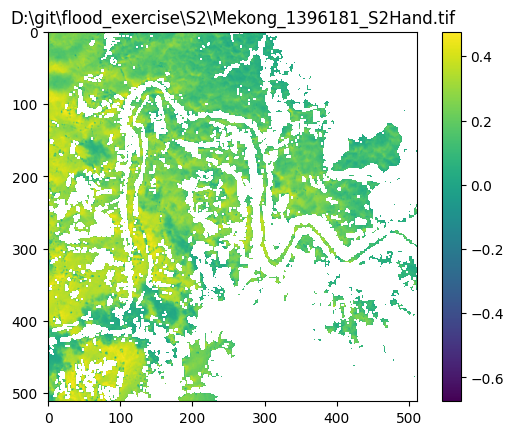

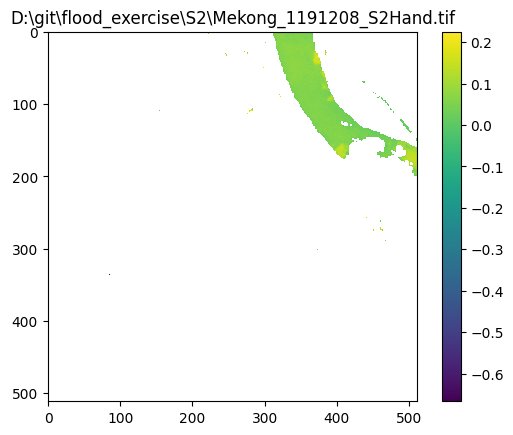

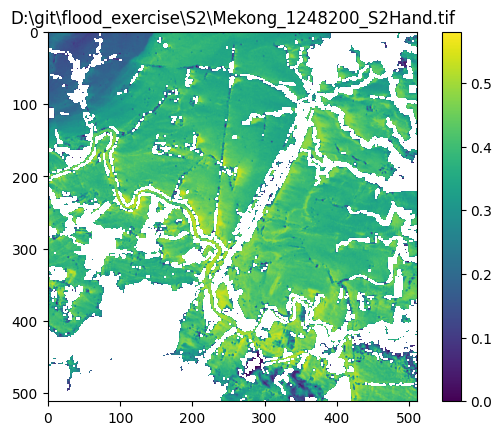

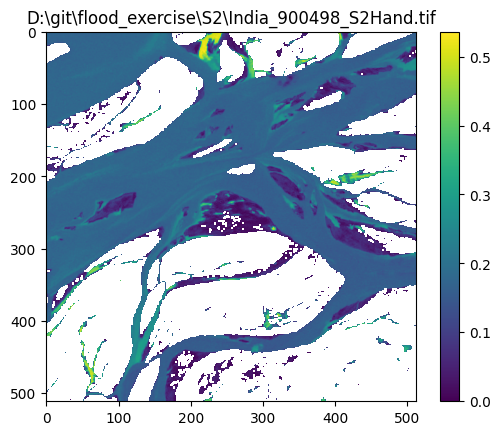

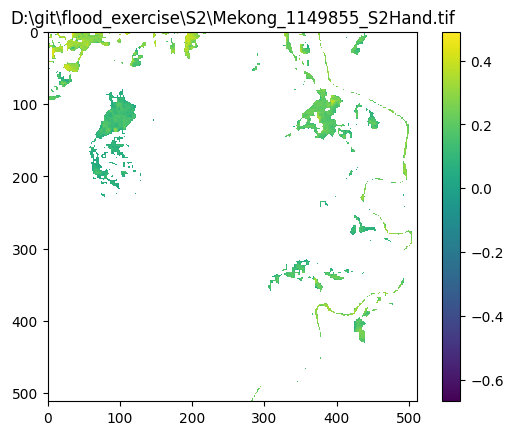

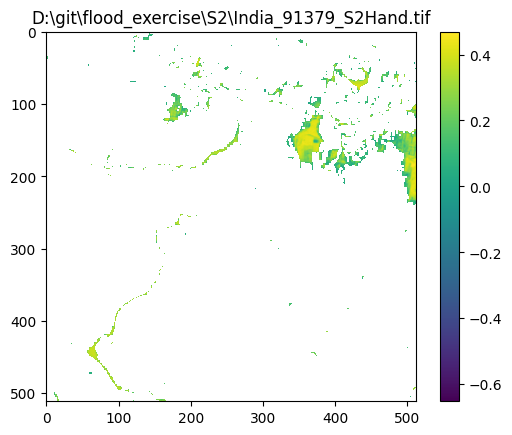

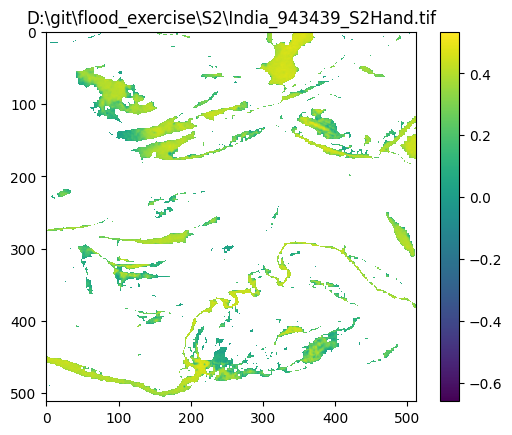

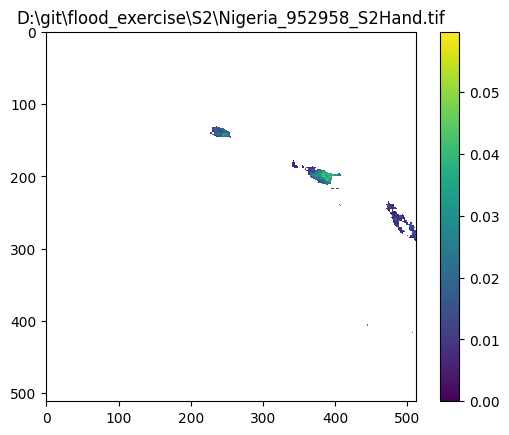

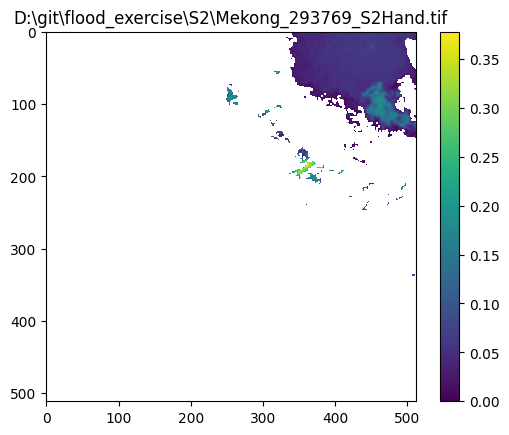

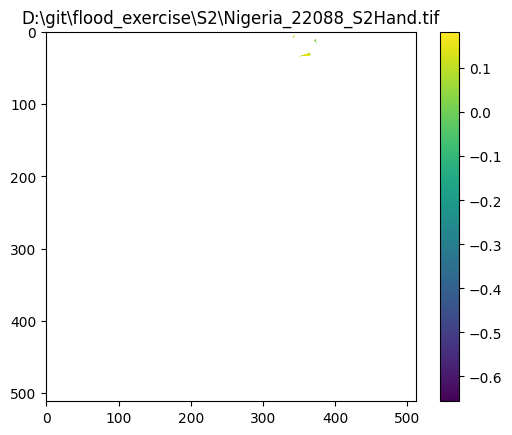

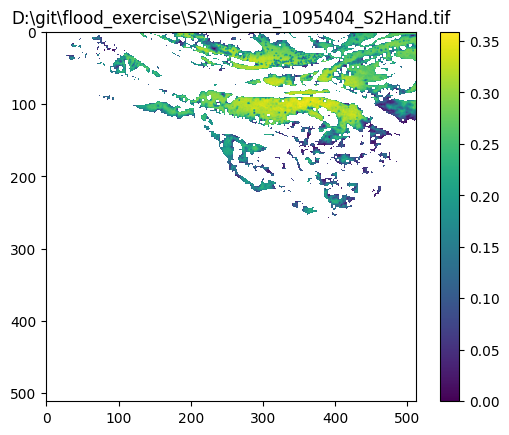

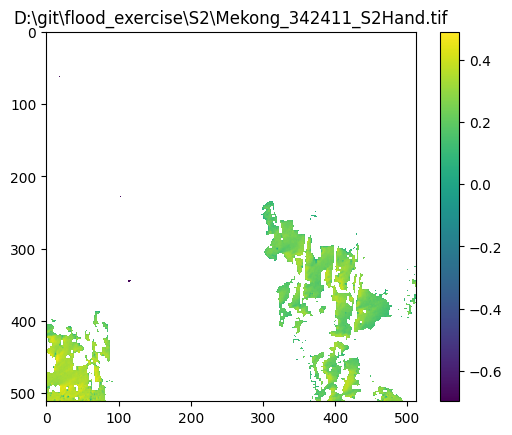

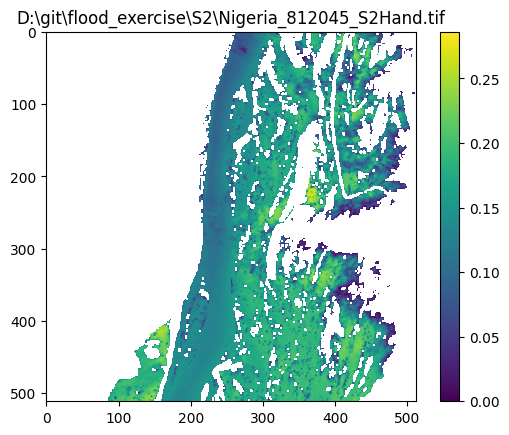

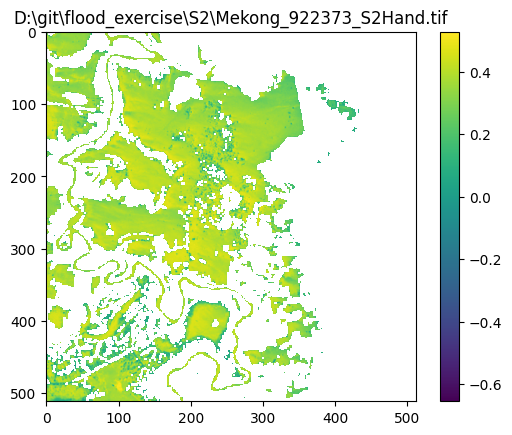

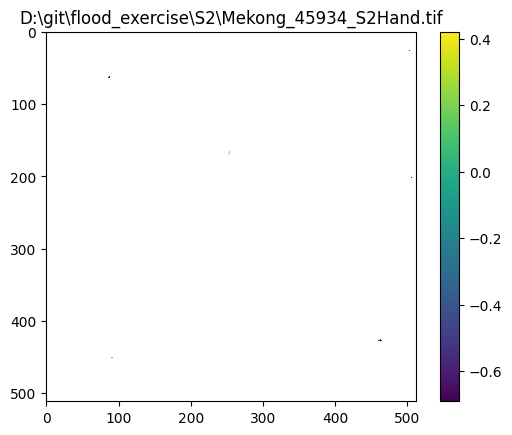

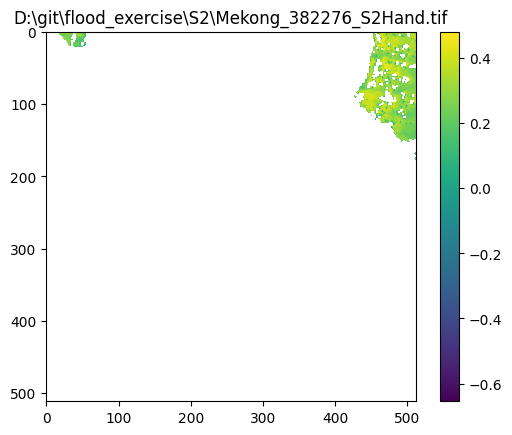

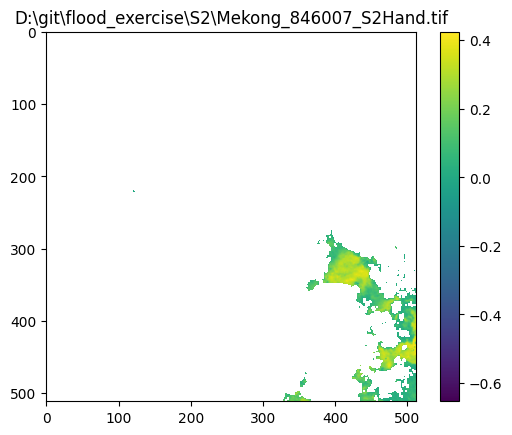

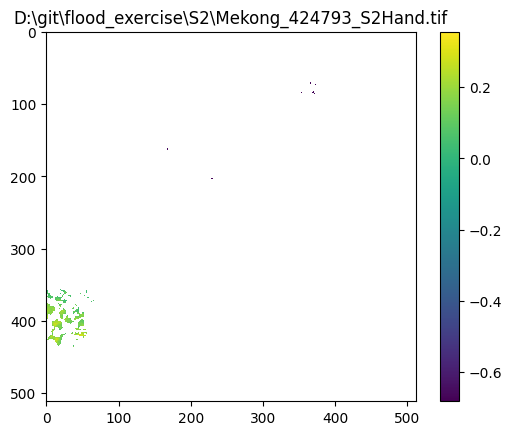

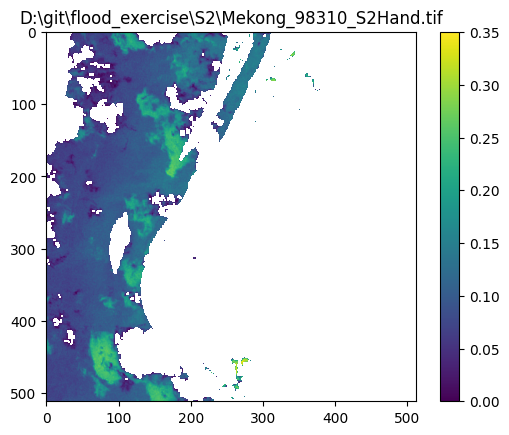

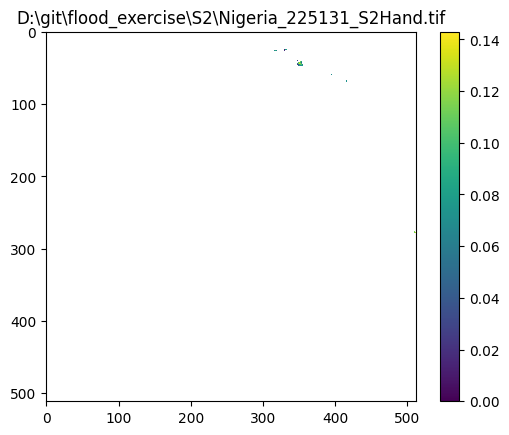

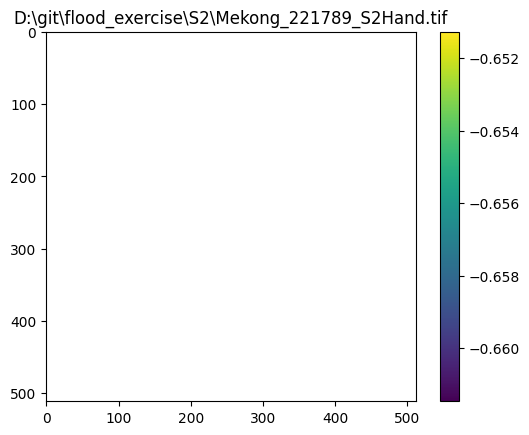

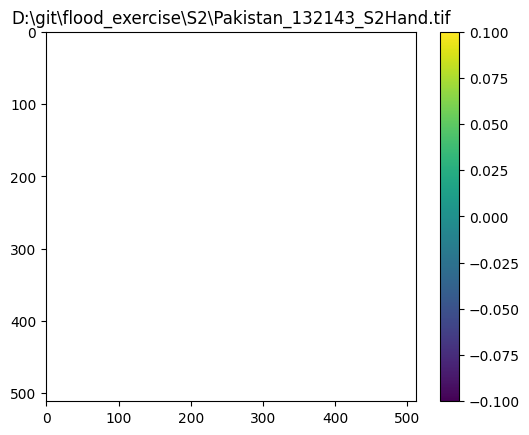

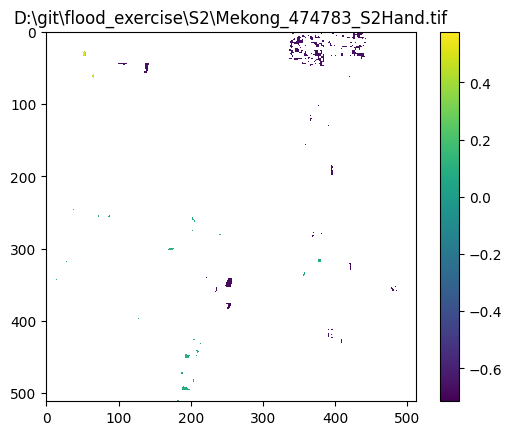

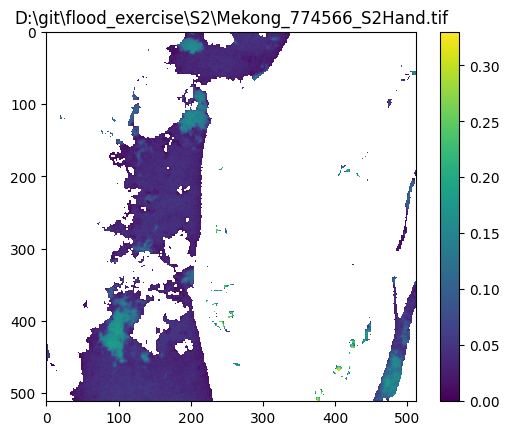

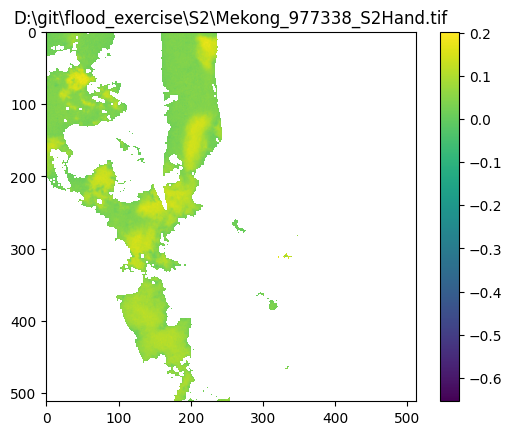

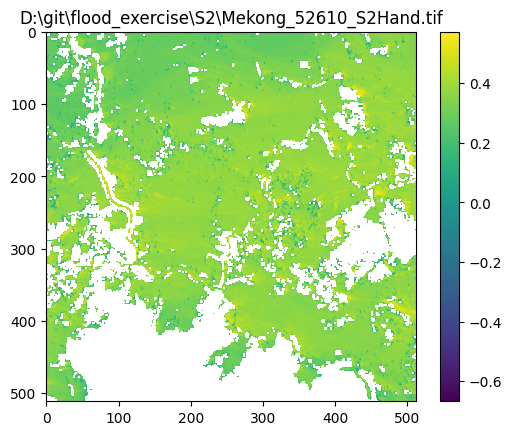

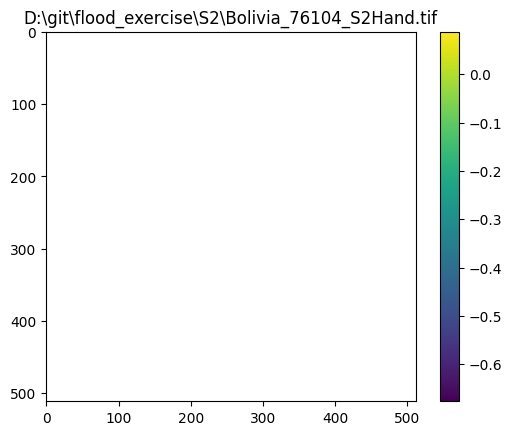

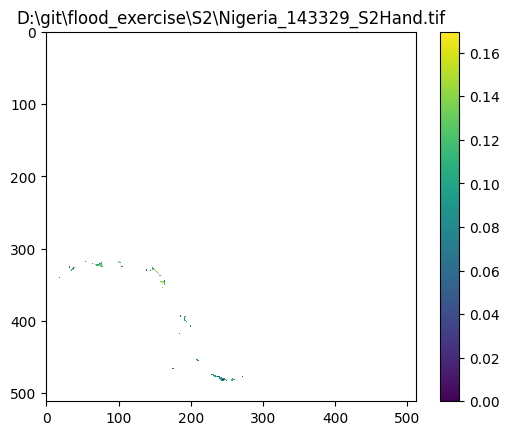

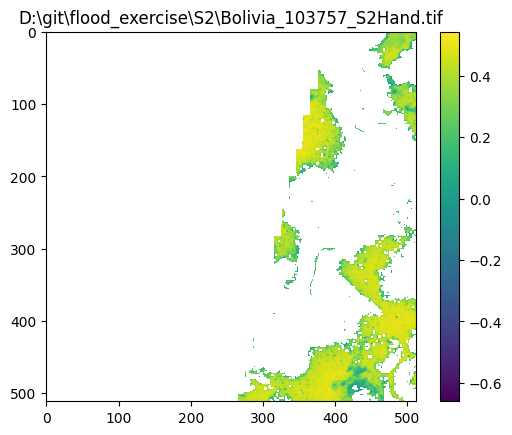

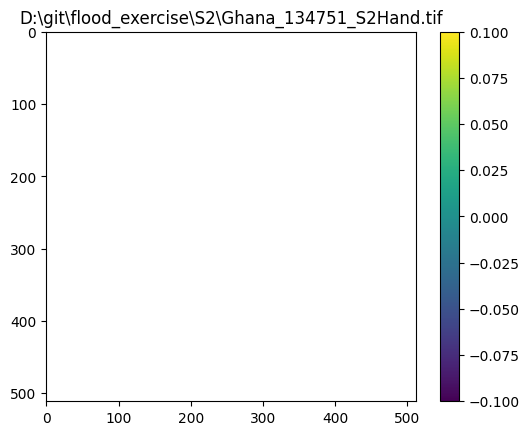

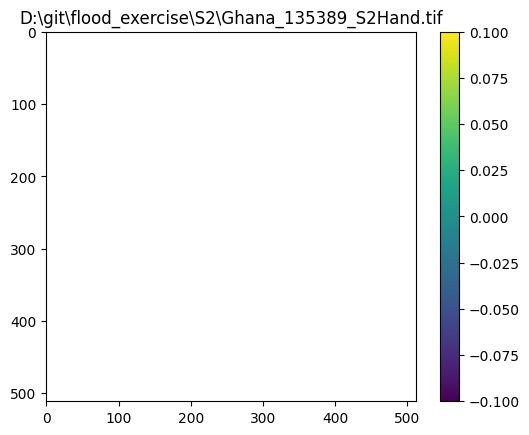

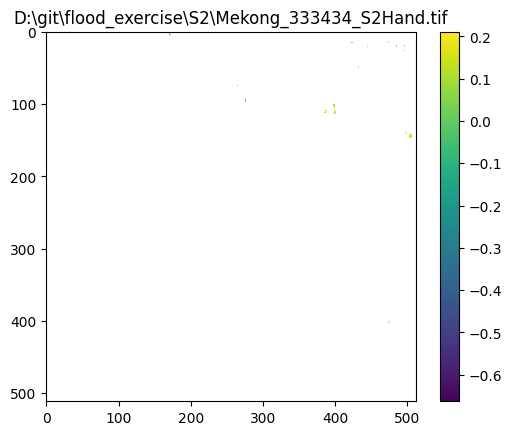

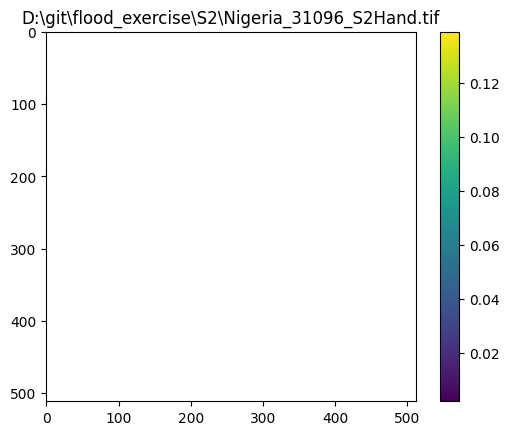

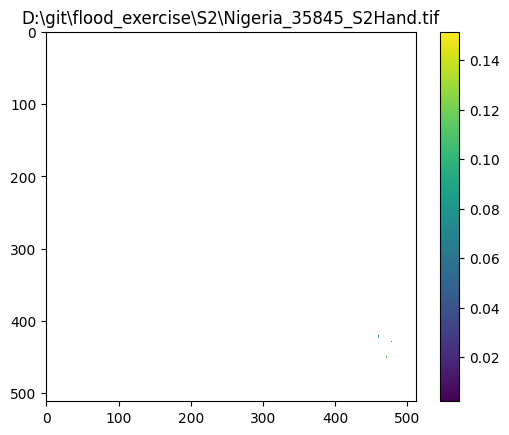

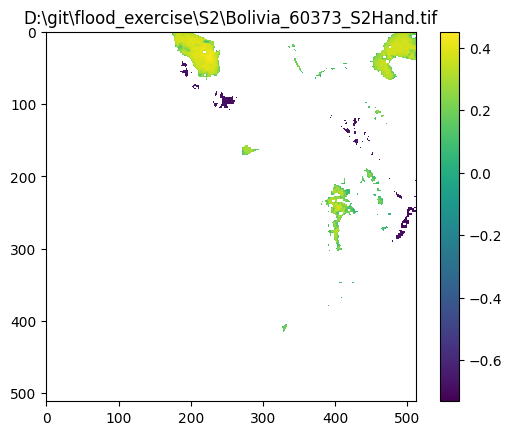

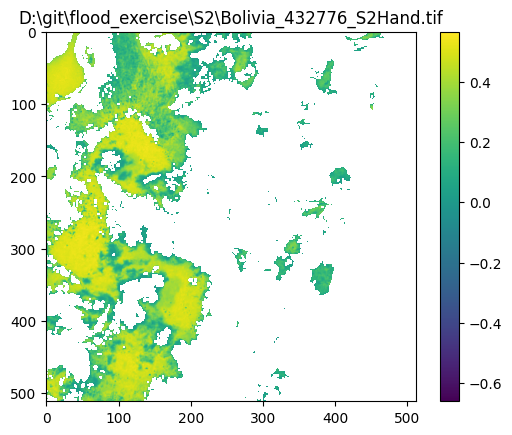

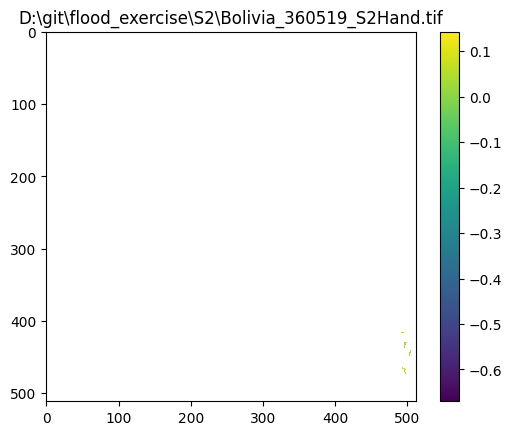

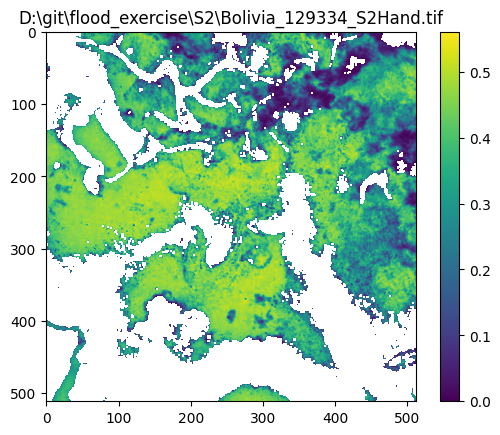

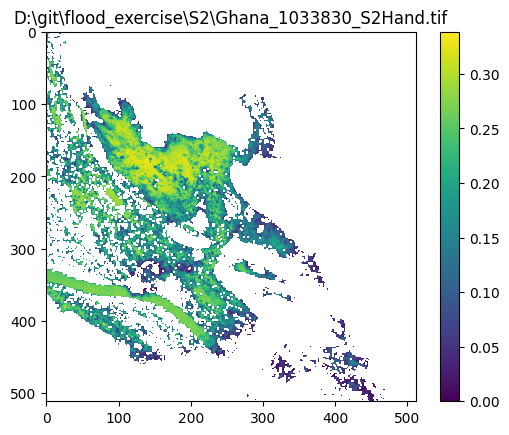

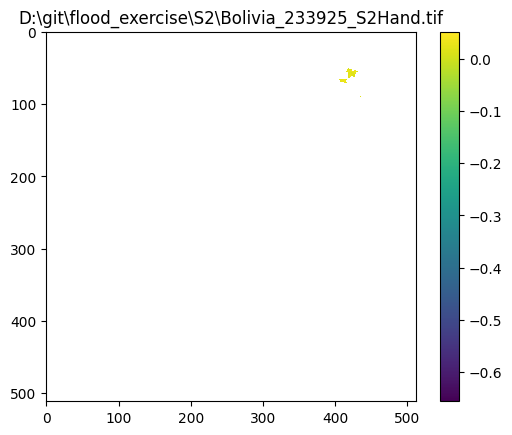

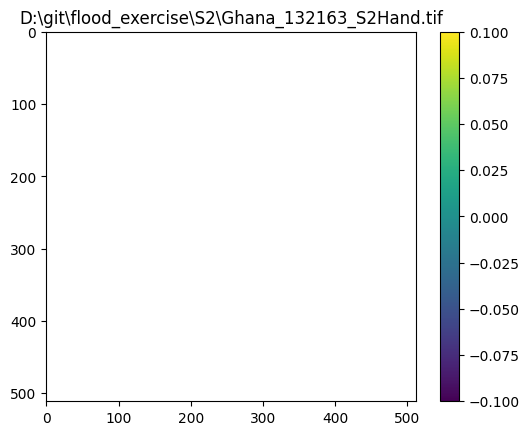

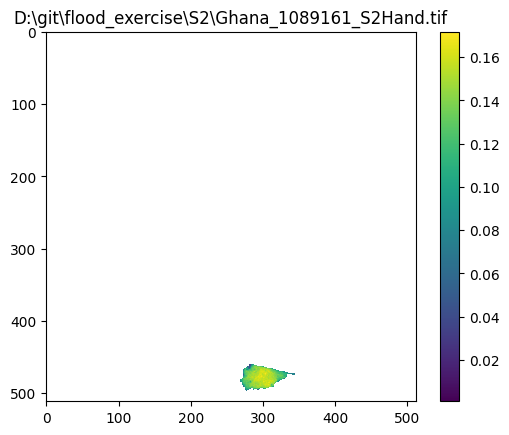

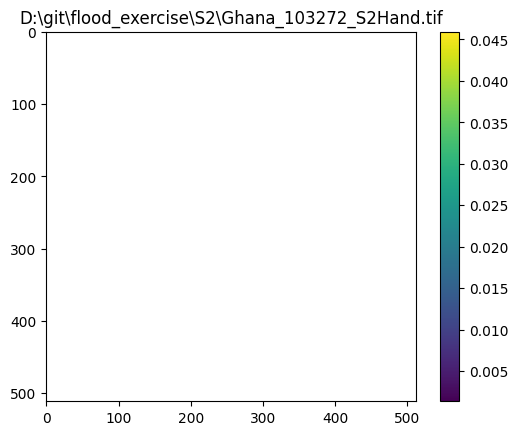

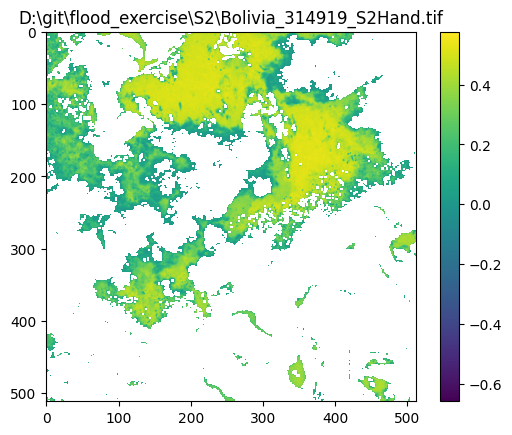

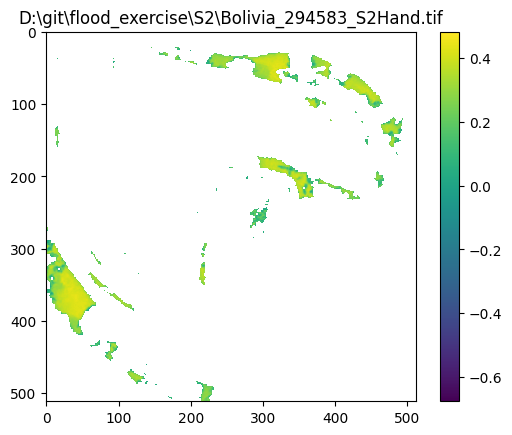

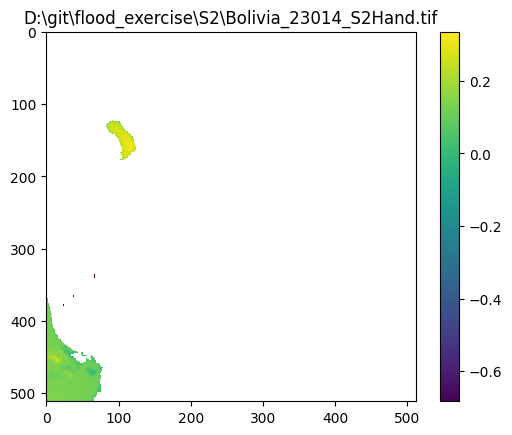

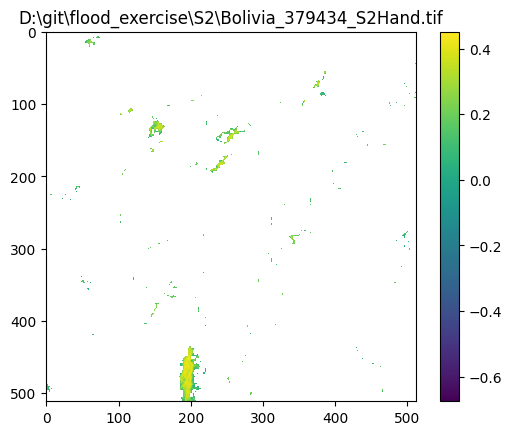

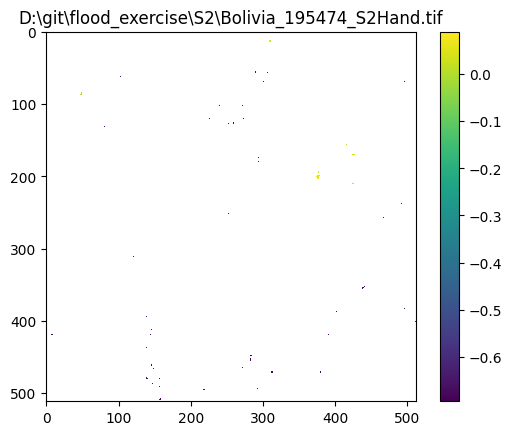

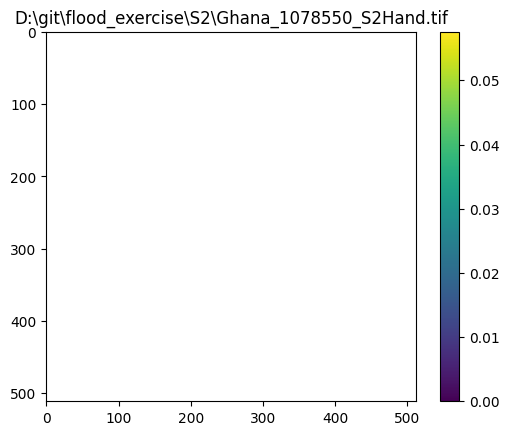

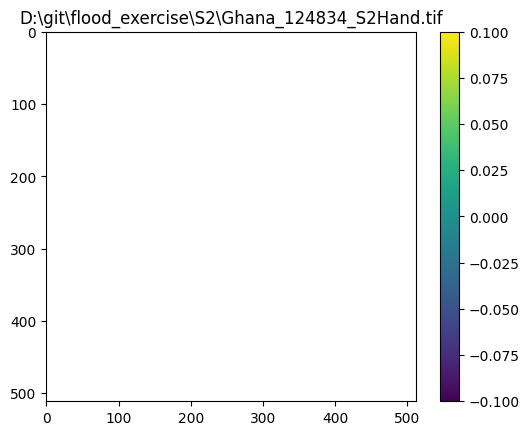

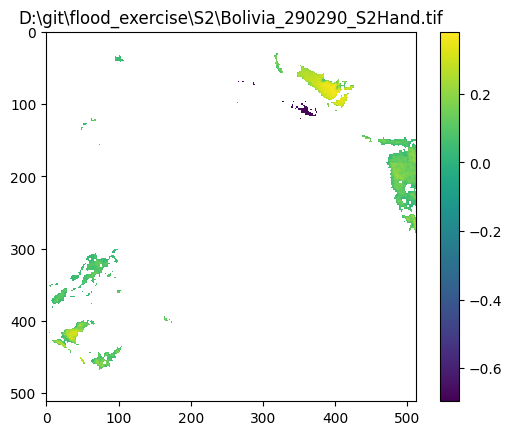

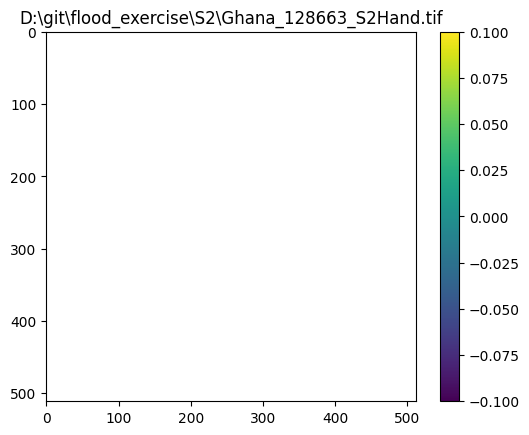

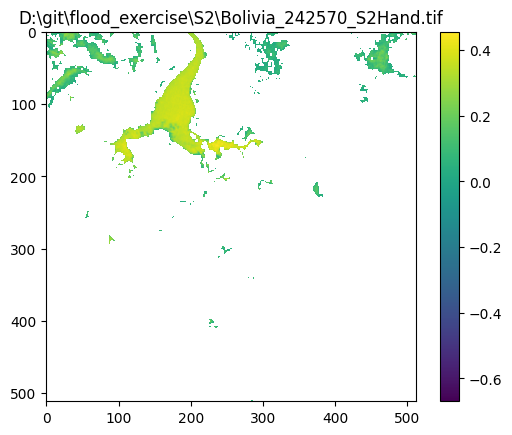

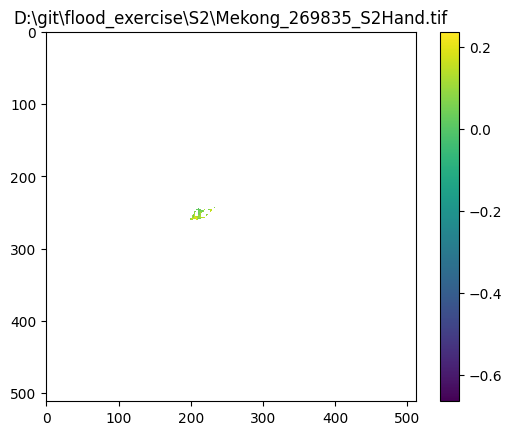

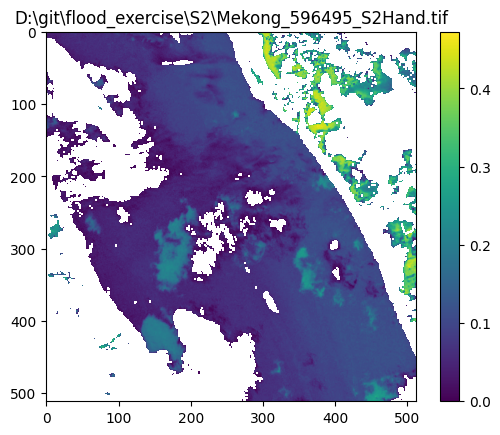

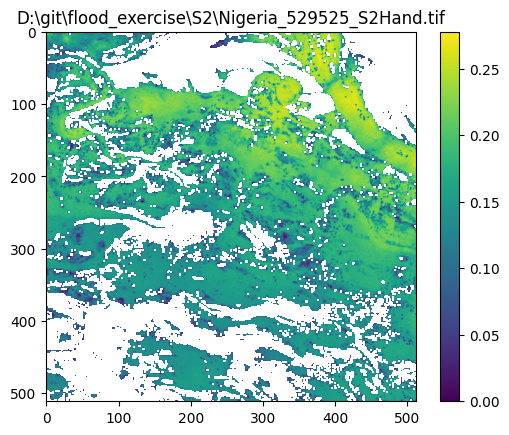

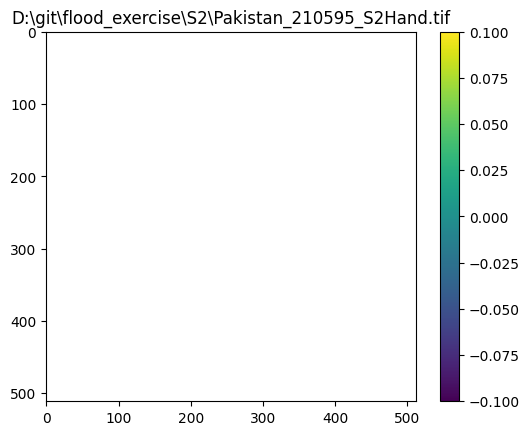

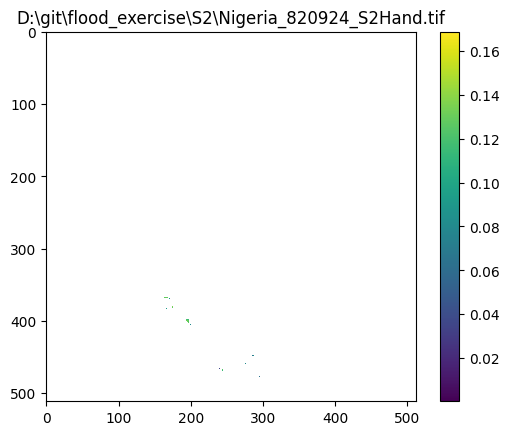

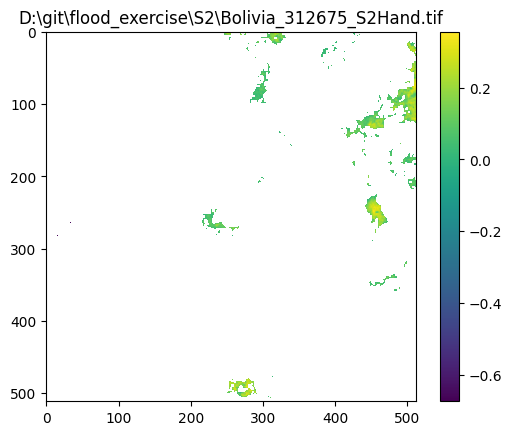

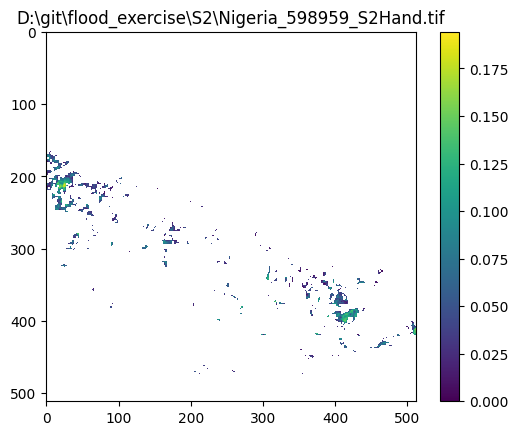

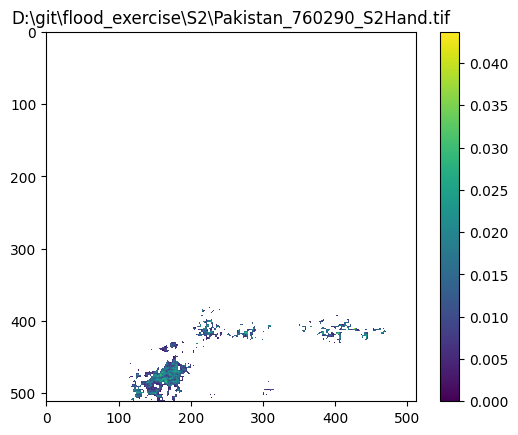

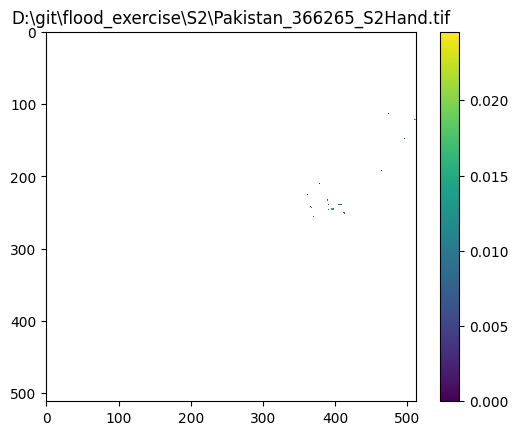

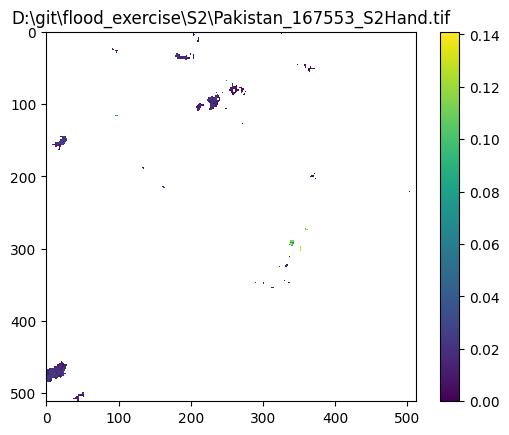

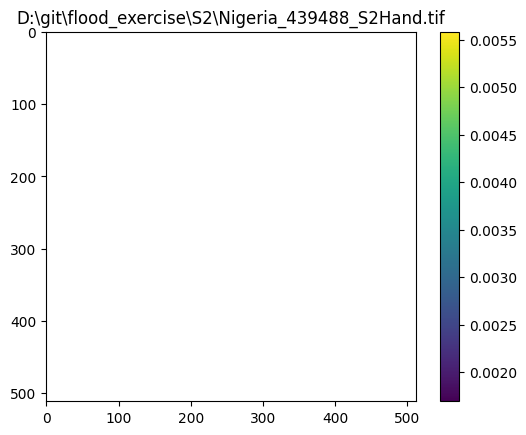

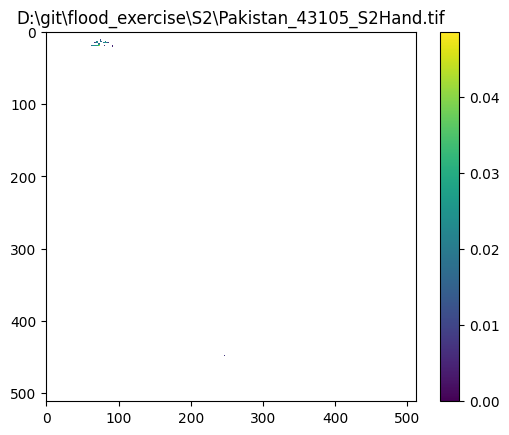

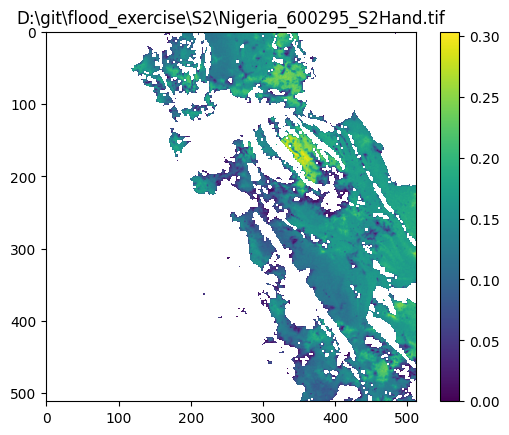

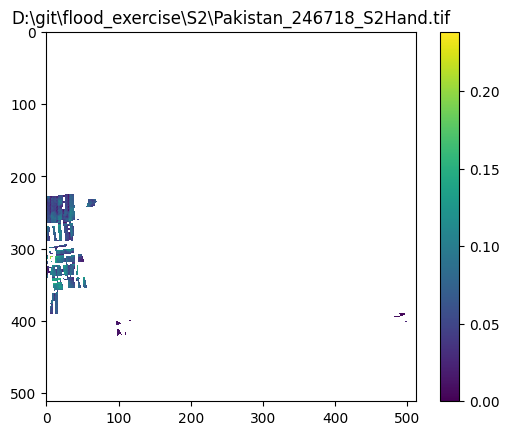

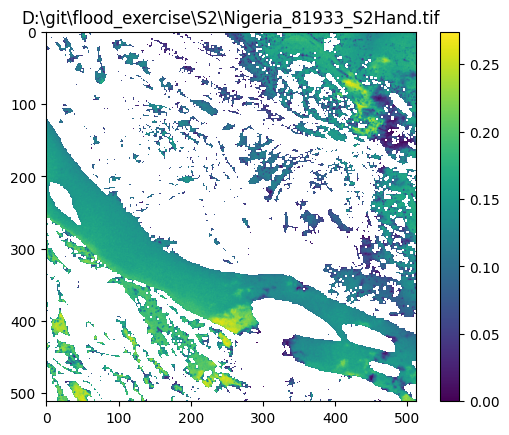

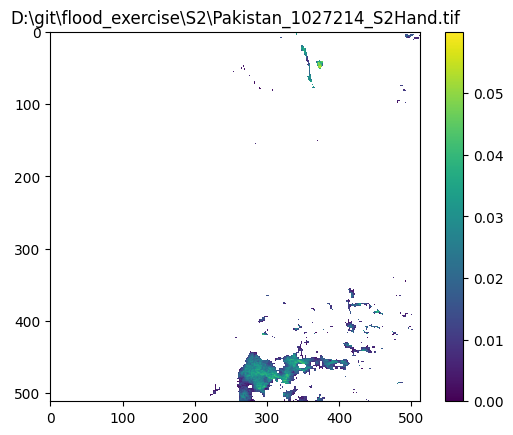

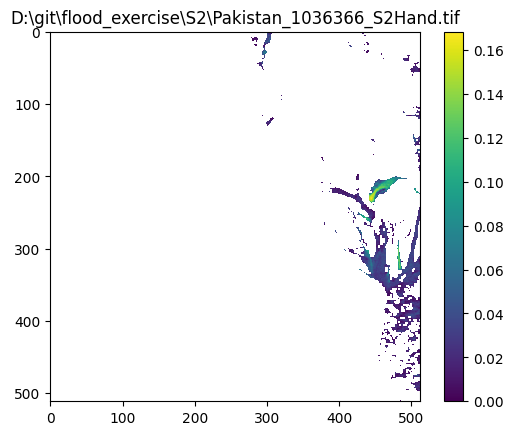

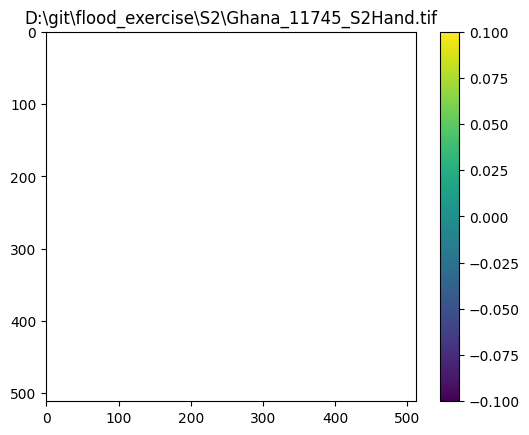

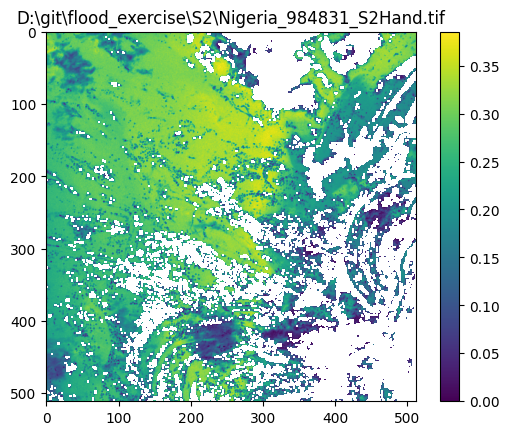

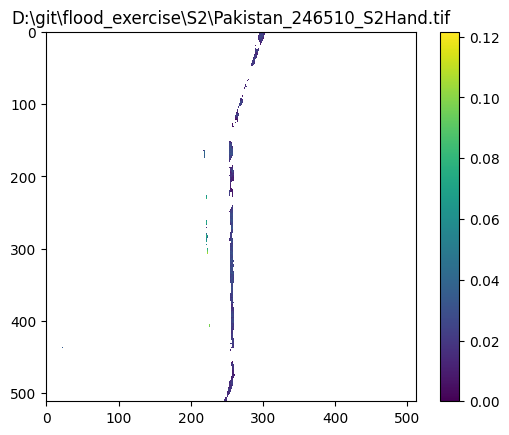

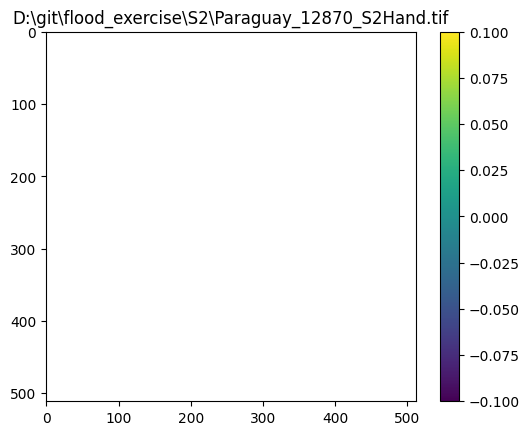

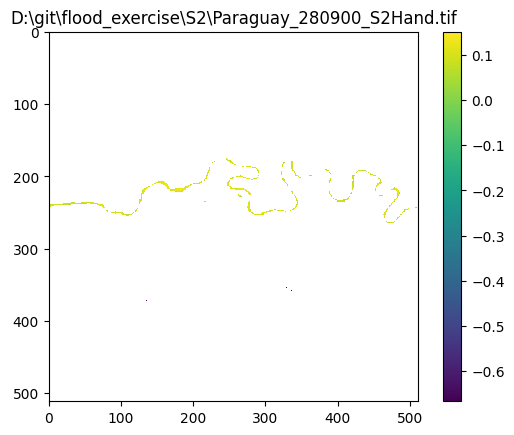

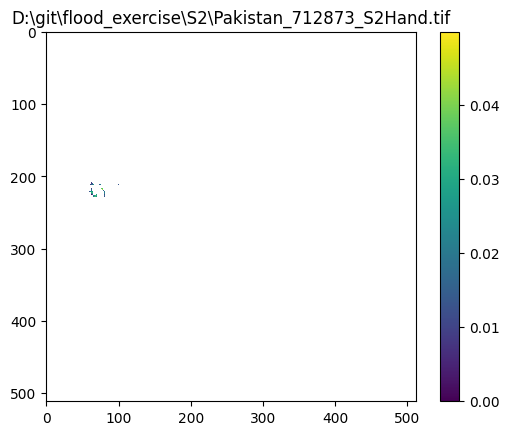

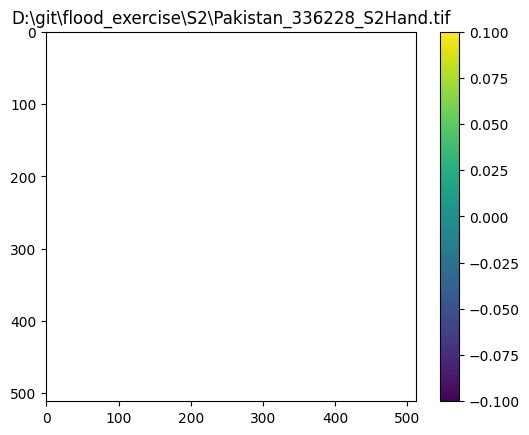

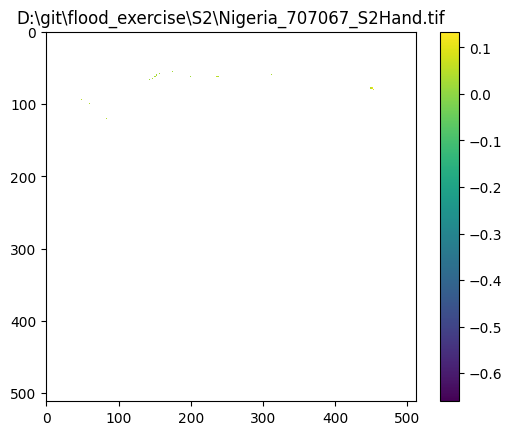

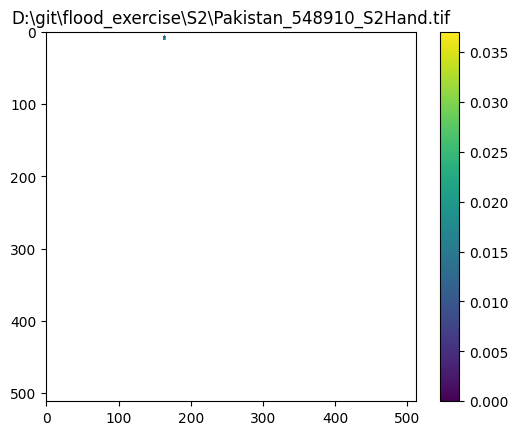

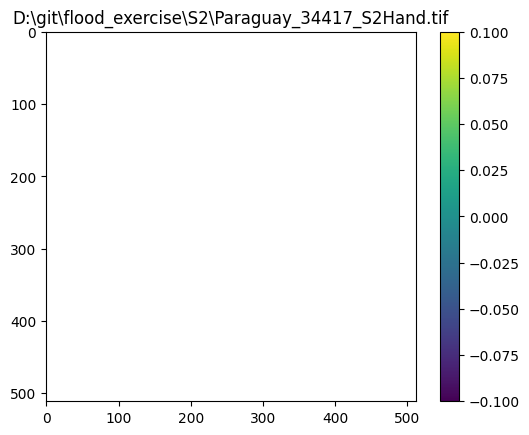

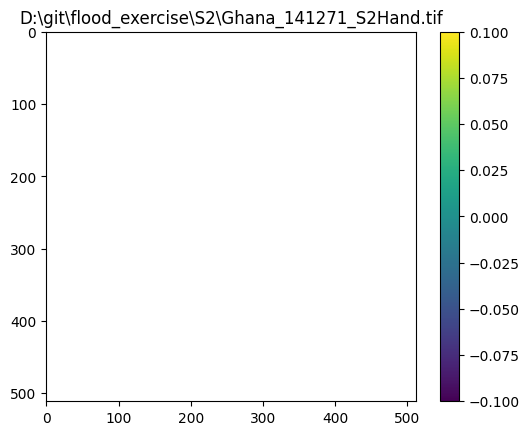

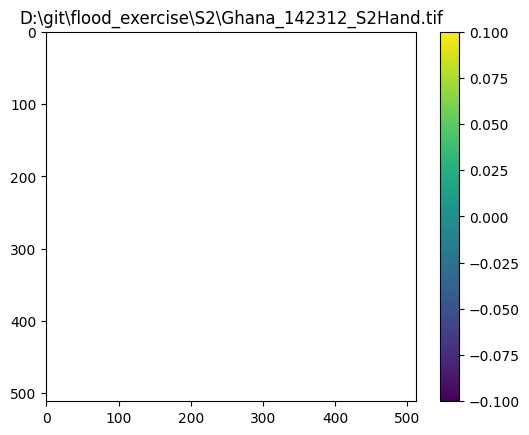

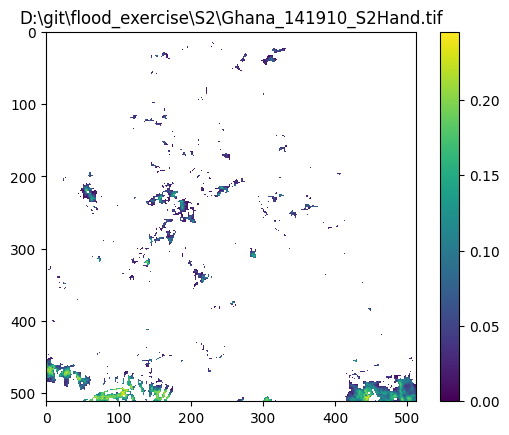

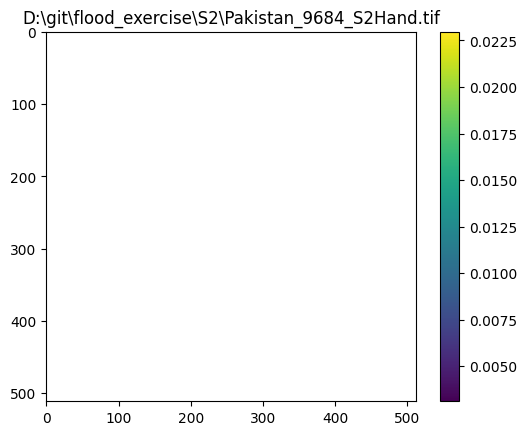

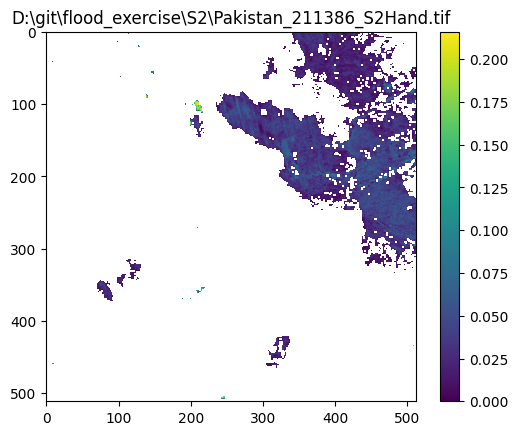

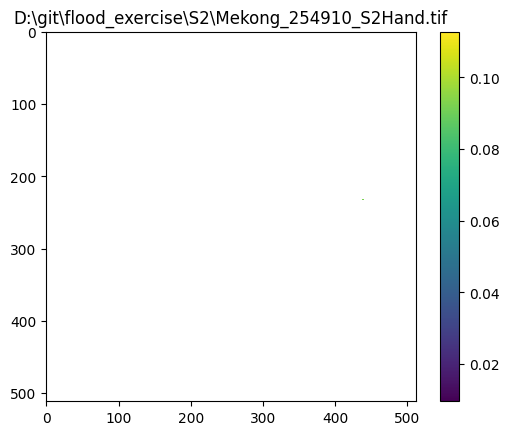

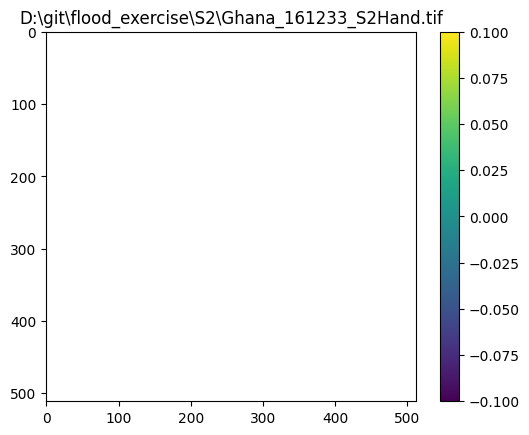

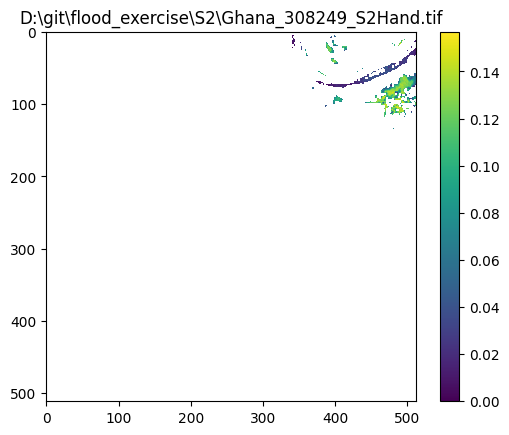

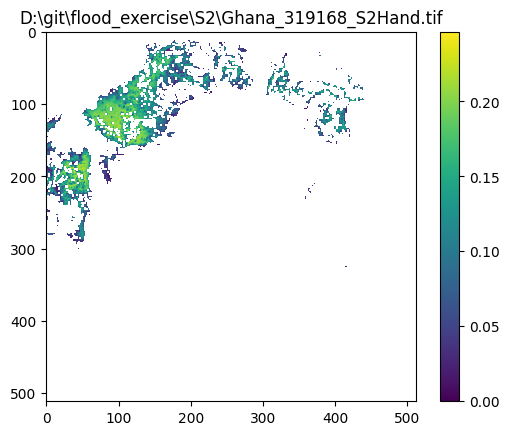

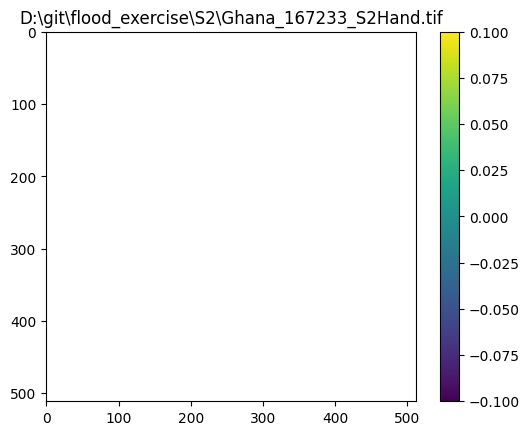

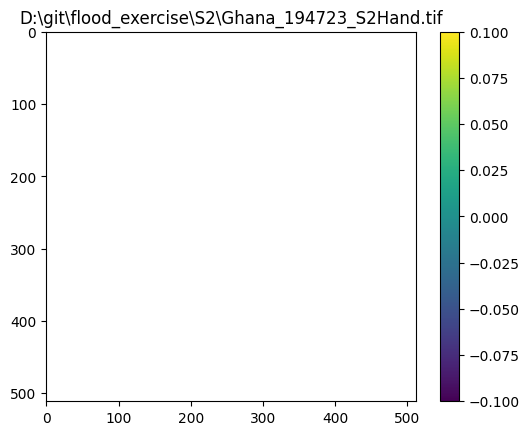

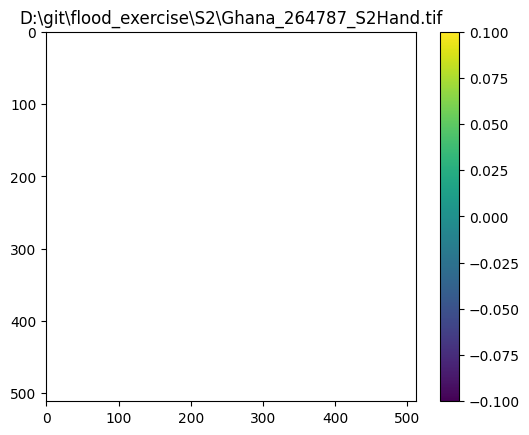

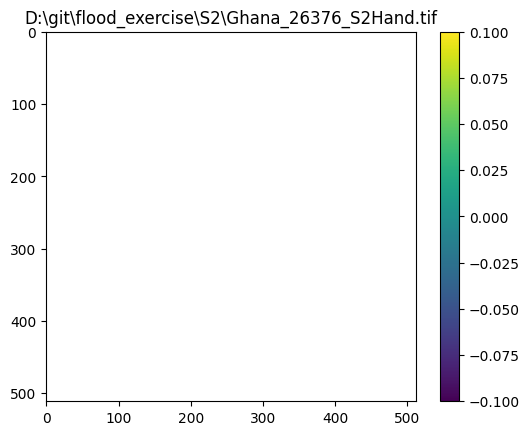

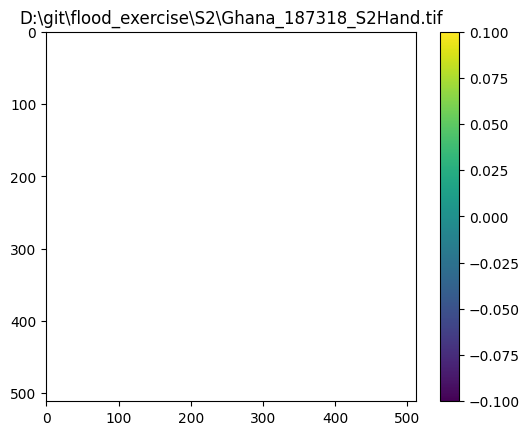

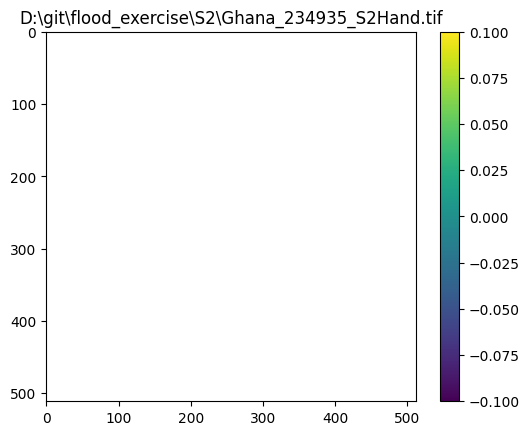

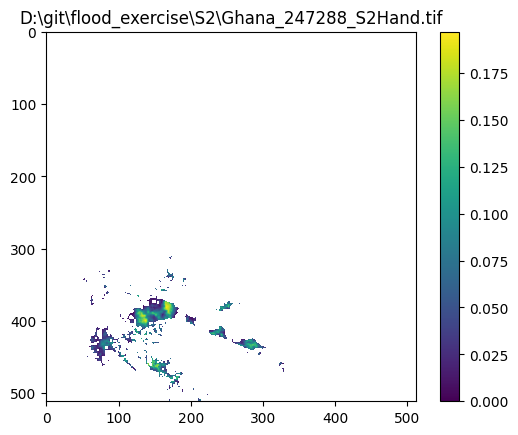

KeyboardInterrupt: 

In [41]:
instance = ndwi(path_to_s2_tiles = r"D:\git\flood_exercise\S2",
                path_to_labeled_tiles= r"D:\git\flood_exercise\S2_HANDLABELED")
instance.threshold
# instance.water_perc.to_csv(r'D:\git\flood_exercise\RESULTS\water_perc_Bolivia.csv')

In [82]:
[x for x in instance.tiles_s2 if 'Bolivia' in x]


['D:\\git\\flood_exercise\\S2\\Bolivia_76104_S2Hand.tif',
 'D:\\git\\flood_exercise\\S2\\Bolivia_103757_S2Hand.tif',
 'D:\\git\\flood_exercise\\S2\\Bolivia_60373_S2Hand.tif',
 'D:\\git\\flood_exercise\\S2\\Bolivia_432776_S2Hand.tif',
 'D:\\git\\flood_exercise\\S2\\Bolivia_360519_S2Hand.tif',
 'D:\\git\\flood_exercise\\S2\\Bolivia_129334_S2Hand.tif',
 'D:\\git\\flood_exercise\\S2\\Bolivia_233925_S2Hand.tif',
 'D:\\git\\flood_exercise\\S2\\Bolivia_314919_S2Hand.tif',
 'D:\\git\\flood_exercise\\S2\\Bolivia_294583_S2Hand.tif',
 'D:\\git\\flood_exercise\\S2\\Bolivia_23014_S2Hand.tif',
 'D:\\git\\flood_exercise\\S2\\Bolivia_379434_S2Hand.tif',
 'D:\\git\\flood_exercise\\S2\\Bolivia_195474_S2Hand.tif',
 'D:\\git\\flood_exercise\\S2\\Bolivia_290290_S2Hand.tif',
 'D:\\git\\flood_exercise\\S2\\Bolivia_242570_S2Hand.tif',
 'D:\\git\\flood_exercise\\S2\\Bolivia_312675_S2Hand.tif']

In [25]:
instance.labels[0].split("\\")[-1].split('_')[1]

'31096'

In [6]:
#|export

class ndwi():

  def __init__(self,
      path_to_imgs : str , # path to the folder that contains the images
      ):
     
     # get list of tif files
     self.list_of_files = utils_func.load_list_paths(path_to_imgs,filter_file = True)
     self.list_of_files = [x for x in self.list_of_files if 'Bolivia' in x]
     
     collector = {CONST.IMG_PATH_WATER_STR : [] , CONST.WATER_PERC_STR : []}
     # calculate NDWI and NDWI mask per image
     for path in self.list_of_files:
         self.ndwi_img ,self.mask , self.perc_water = self._ndwi_s2_(path)
         collector[CONST.IMG_PATH_WATER_STR].append(path)
         collector[CONST.WATER_PERC_STR].append(self.perc_water)

     self.water_perc = pd.DataFrame(collector)
           
  def _ndwi_s2_(self ,
                     path):
         
         with rasterio.open(path) as src:
            green = src.read(CONST.GREEN_BAND)
            nir = src.read(CONST.NIR_BAND)

            ndwi = (green - nir) / (green + nir)

            # Replace NaN values with 0
            ndwi = np.nan_to_num(ndwi, nan=-1)
            # generate mask 
            mask = np.where(ndwi<0 ,0 ,1)

            #calculate precentage of water pixel out of all the pixels in the image
            # count_water_pixels = np.sum(mask)
            # total_pixels = mask.shape[0]*mask.shape[1]
            perc_water = round((np.sum(mask) / (mask.shape[0]*mask.shape[1]))*100,2)
         return ndwi , mask ,perc_water
     




In [9]:
instance = ndwi(path_to_imgs = r"D:\git\flood_exercise\S2")
instance.water_perc.to_csv(r'D:\git\flood_exercise\RESULTS\water_perc_Bolivia.csv')

C:\Users\USER\AppData\Local\Temp\ipykernel_15656\3748574584.py:29: RuntimeWarning: invalid value encountered in divide
  ndwi = (green - nir) / (green + nir)
